# Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import warnings
warnings.filterwarnings("ignore")

# Example of map visualization

Source:
- <a href="https://en.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(nominal)_per_capita">GDP data</a>

In [17]:
data = pd.read_csv("../data/eu_gdp_per_capita_by_country_2019.csv")
data.rename(columns={"gdp_per_capita (USD)": "GDP per capita (USD)"}, inplace=True)
data.head(10)

,country,GDP per capita (USD)
0,Austria,55060
1,Belgium,46421
2,Bulgaria,9828
3,Croation,14936
4,Cyprus,27858
5,Czech Republic,23495
6,Denmark,60170
7,Estonia,23723
8,Finland,48783
9,France,40494


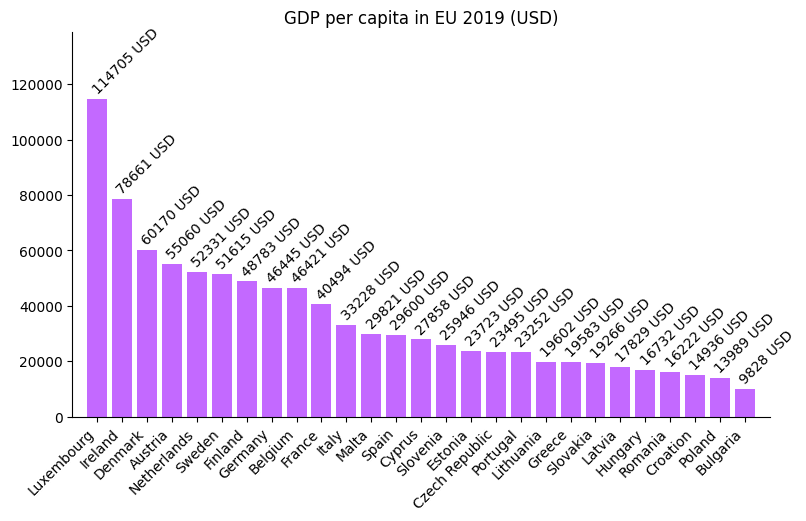

In [21]:
data = pd.read_csv("../data/eu_gdp_per_capita_by_country_2019.csv")
data.sort_values("gdp_per_capita (USD)", inplace=True, ascending=False)
data.reset_index(drop=True, inplace=True)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.figure(figsize=(9, 5))
for i in range(len(data)):
    plt.bar(i, data.loc[i, "gdp_per_capita (USD)"], color="#c369ff")
    plt.text(i-0.3, data.loc[i, "gdp_per_capita (USD)"]+2000, f"{data.loc[i, "gdp_per_capita (USD)"]} USD", rotation=45, ha="left")
plt.xticks(np.arange(len(data)), data["country"], rotation=45, ha="right")
plt.xlim(-1, len(data))
plt.ylim(0, 139000)
plt.title("GDP per capita in EU 2019 (USD)")
plt.savefig("imgs/gdp_eu_bar.png")

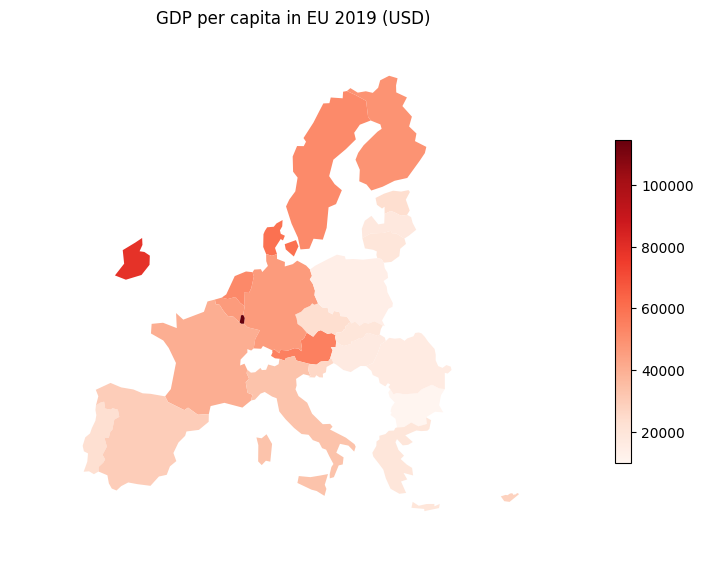

In [18]:
geodata = gpd.read_file("../data/geojson/world_countries.json")
geodata.rename(columns={"name": "country"}, inplace=True)
data = pd.read_csv("../data/eu_gdp_per_capita_by_country_2019.csv")
data["country"].replace("France", "France Without South America", inplace=True)

merged_data = pd.merge(data, geodata, on="country")
merged_data = gpd.GeoDataFrame(merged_data, geometry=merged_data['geometry'])
merged_data.head(3)

gplt.choropleth(
    merged_data,
    hue='gdp_per_capita (USD)',
    projection=gcrs.AlbersEqualArea(),
    figsize=(10, 7),
    cmap="Reds",
    legend=True,
    legend_kwargs={
        "shrink": 0.6
    }
)
plt.title("GDP per capita in EU 2019 (USD)")
plt.savefig("imgs/gdp_eu_map.png")

# Poland edges

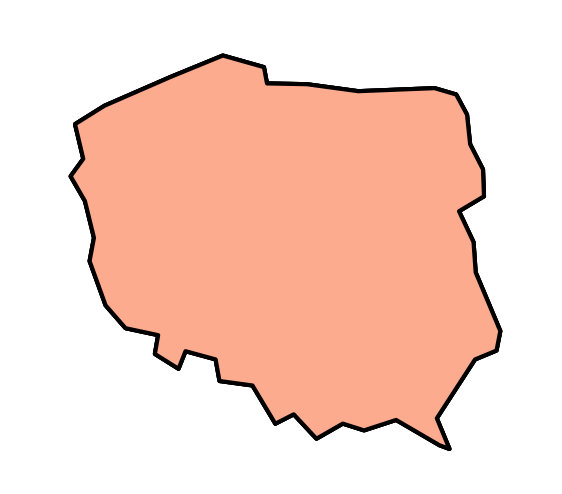

In [59]:
geodata = gpd.read_file("../data/geojson/world_countries.json")
geodata.rename(columns={"name": "country"}, inplace=True)
data = pd.DataFrame({"country": ["Poland"], "value": [1]})

merged_data = pd.merge(data, geodata, on="country")
merged_data = gpd.GeoDataFrame(merged_data, geometry=merged_data['geometry'])
merged_data = pd.concat([merged_data, merged_data, merged_data]).reset_index(drop=True)
merged_data.loc[0, "value"] = 0
merged_data.loc[2, "value"] = 0.3

gplt.choropleth(
    merged_data,
    hue="value",
    projection=gcrs.AlbersEqualArea(),
    figsize=(7, 7),
    cmap="Reds",
    edgecolor="black",
    linewidth=3
)
plt.savefig("imgs/map_poland.png")

# GeoJSON example

In [ ]:
{
	"type": "FeatureCollection",
	"features": [
		{
		"type":"Feature",
		"properties":{"name":"Poland"},
		"geometry":{
			"type":"Polygon",
			"coordinates":[[
                    [15.016996,51.106674],
                    [14.607098,51.745188],
                    ...,
                    [15.490972,50.78473],
                    [15.016996,51.106674]
                ]]
            },
			"id":"POL"
		},
        ...
	]
}

# Map projections

### Mercator projection

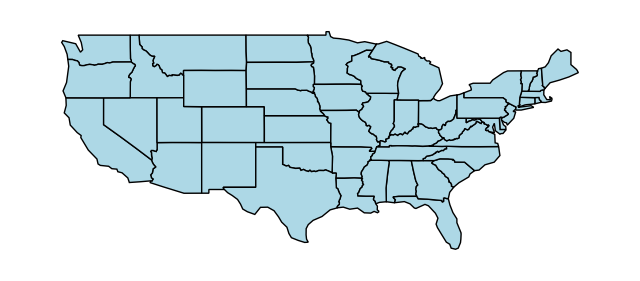

In [14]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(
    contiguous_usa,
    edgecolor='black',
    facecolor='lightblue',
    figsize=(8, 6)
)
plt.savefig("imgs/mercator_projection.png")

### Albers projection

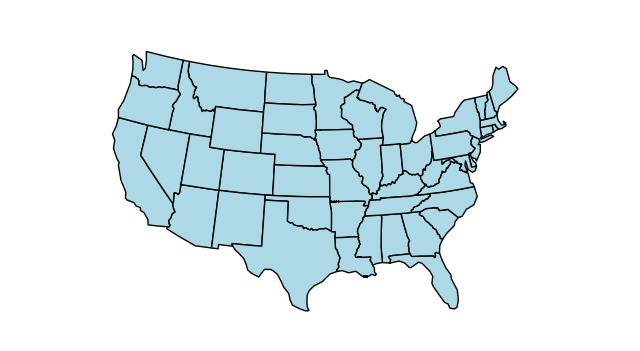

In [15]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='black',
    facecolor='lightblue',
    figsize=(8, 6)
)
plt.savefig("imgs/albers_projection.png")